# **Check duplicate url**

In [31]:
import os
import pandas as pd

data_dir = r"data\urls"

# Lấy danh sách các tệp trong thư mục
files = os.listdir(data_dir)

duplications_found = False

for file_name in files:
    file_path = os.path.join(data_dir, file_name)

    # Đọc tệp CSV
    df = pd.read_csv(file_path)

    # Kiểm tra cột thứ ba có trùng lặp không
    duplicates = df.iloc[:, 2].duplicated(keep=False)
    
    if duplicates.any():
        duplications_found = True
        print(f"File path: {file_path}")
        print("\nDuplicates in column 3:")
        print(df[duplicates])
        print("\n")

if not duplications_found:
    print("No duplicates found in any file.")

No duplicates found in any file.


# **Download imgs**

In [19]:
import os
import requests
import pandas as pd

In [20]:
base_dir = 'data'
imgs_dir = os.path.join(base_dir, 'images')
urls_dir = os.path.join(base_dir, 'urls')

csv_files = [file for file in os.listdir(urls_dir) if file.endswith('.csv')]
len(csv_files)

84

*Check duplicate*

*Save imgs by url*

In [21]:
fail =[]
def download_img(file):
    dish_name = os.path.splitext(file)[0]  # Lấy tên món ăn từ tên file CSV
    path = os.path.join(urls_dir, file)
    data = pd.read_csv(path, encoding='utf-8')
    fail_download = []

    for i in range(len(data)):
        row = data.iloc[i]
        img_url = row.iloc[2]

        if isinstance(img_url, str):  # Kiểm tra img_url có phải chuỗi không
            img_extension = os.path.splitext(img_url)[-1].lower()

            # Kiểm tra nếu phần mở rộng là .jpg hoặc .png, nếu không thì mặc định là .jpg
            if img_extension not in ['.jpg', '.jpeg', '.png']:
                img_extension = '.jpg'
    
            img_name = f"{dish_name}_{i+1}{img_extension}"
            img_path = os.path.join(imgs_dir, img_name)
    
            try:
                response = requests.get(img_url, timeout=10)  # Thêm timeout để kiểm tra lỗi kết nối
                response.raise_for_status()  # Kiểm tra lỗi HTTP

                with open(img_path, 'wb') as img_file:
                    img_file.write(response.content)

            except requests.exceptions.RequestException as e:
                fail_download.append(img_url)
        fail.append(fail_download)

    if fail_download:
        print(f"{file}")
        print("Fail download:")
        for url in fail_download:
            print(url)
    else:
        print(f"All images of {file} are downloaded.")

In [22]:
for file in csv_files:
    download_img(file)

All images of banh_bao.csv are downloaded.
All images of banh_beo.csv are downloaded.
All images of banh_canh.csv are downloaded.
All images of banh_chung.csv are downloaded.
All images of banh_crepe.csv are downloaded.
All images of banh_cuon.csv are downloaded.
banh_da.csv
Fail download:
https://luhanhvietnam.com.vn/du-lich/vnt_upload/news/03_2021/quan-canh-ca-thai-binh-foody.jpg
All images of banh_duc.csv are downloaded.
All images of banh_gio.csv are downloaded.
All images of banh_khot.csv are downloaded.
All images of banh_khuc.csv are downloaded.
All images of banh_mi.csv are downloaded.
All images of banh_mousse.csv are downloaded.
All images of banh_pia.csv are downloaded.
All images of banh_ran.csv are downloaded.
All images of banh_tao.csv are downloaded.
All images of banh_te.csv are downloaded.
All images of banh_tom.csv are downloaded.
All images of banh_trang.csv are downloaded.
All images of banh_troi.csv are downloaded.
All images of banh_xeo.csv are downloaded.
All ima

# **Check duplicate img**

Images with hash ffff81818181ffff are duplicates:


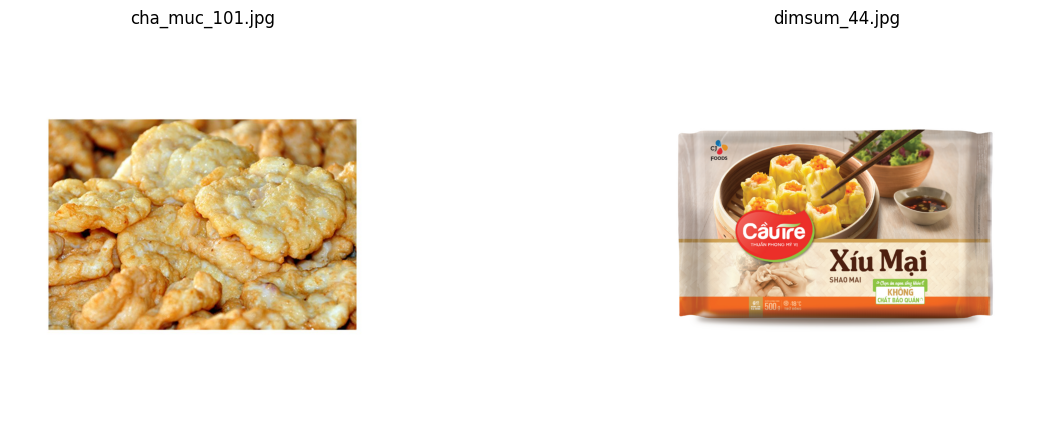

Images with hash 003c7e7e7e7e3c00 are duplicates:


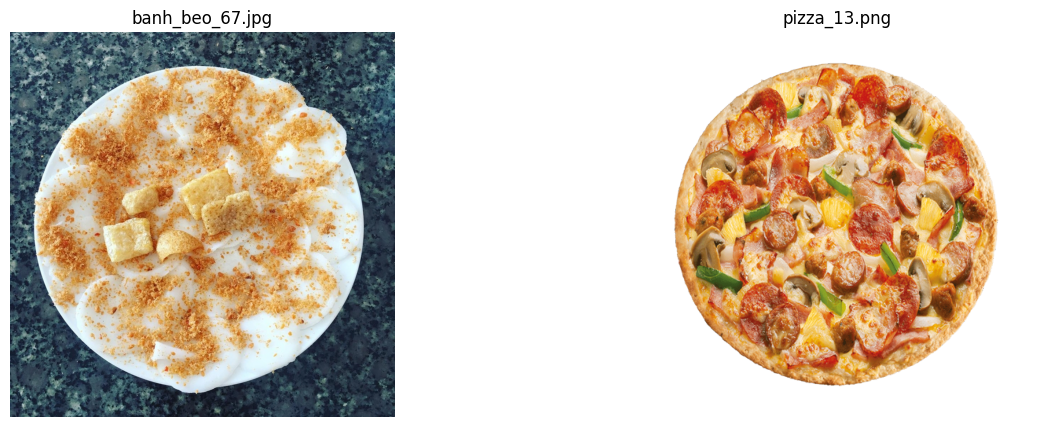

Images with hash ffff00000000ffff are duplicates:


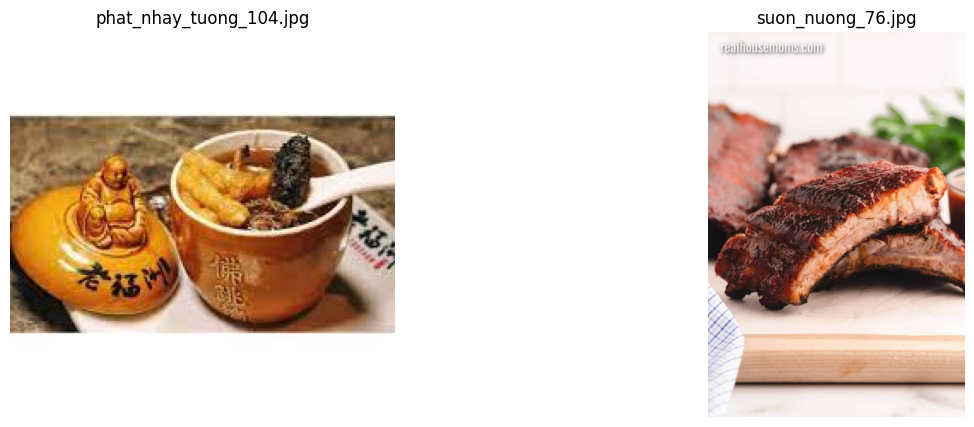

In [33]:
from PIL import Image
import imagehash
import os
import matplotlib.pyplot as plt

def find_duplicates(directory):
    hash_dict = {}
    duplicates = {}

    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(directory, filename)
            img = Image.open(path)
            hash = imagehash.average_hash(img)

            if hash in hash_dict:
                if hash in duplicates:
                    duplicates[hash].append(path)
                else:
                    duplicates[hash] = [hash_dict[hash], path]
            else:
                hash_dict[hash] = path

    return duplicates

def display_duplicates(duplicates):
    for hash_value, file_list in duplicates.items():
        print(f"Images with hash {hash_value} are duplicates:")
        fig, axes = plt.subplots(1, len(file_list), figsize=(15, 5))
        for ax, filepath in zip(axes, file_list):
            img = Image.open(filepath)
            ax.imshow(img)
            ax.set_title(os.path.basename(filepath))
            ax.axis('off')
        plt.show()

directory = r'data\images'
duplicates = find_duplicates(directory)

if duplicates:
    display_duplicates(duplicates)
else:
    print("No duplicate images found.")

In [34]:
len(duplicates)

3

# **Display sample images from dataset**

In [55]:
import os
from collections import defaultdict
import random
from PIL import Image
import matplotlib.pyplot as plt

In [56]:
def get_food_name(directory):
    # Tạo từ điển với giá trị mặc định là danh sách rỗng
    food_files = defaultdict(list)

    # Lọc các tệp ảnh và phân loại theo tên món ăn
    for file_name in os.listdir(directory):
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            name, _ = os.path.splitext(file_name)
            name = name.rsplit('_', 1)[0]
            food_name = name.replace('_', ' ')
            
            # Thêm tên file vào danh sách của món ăn tương ứng
            food_files[food_name].append(file_name)

    return food_files

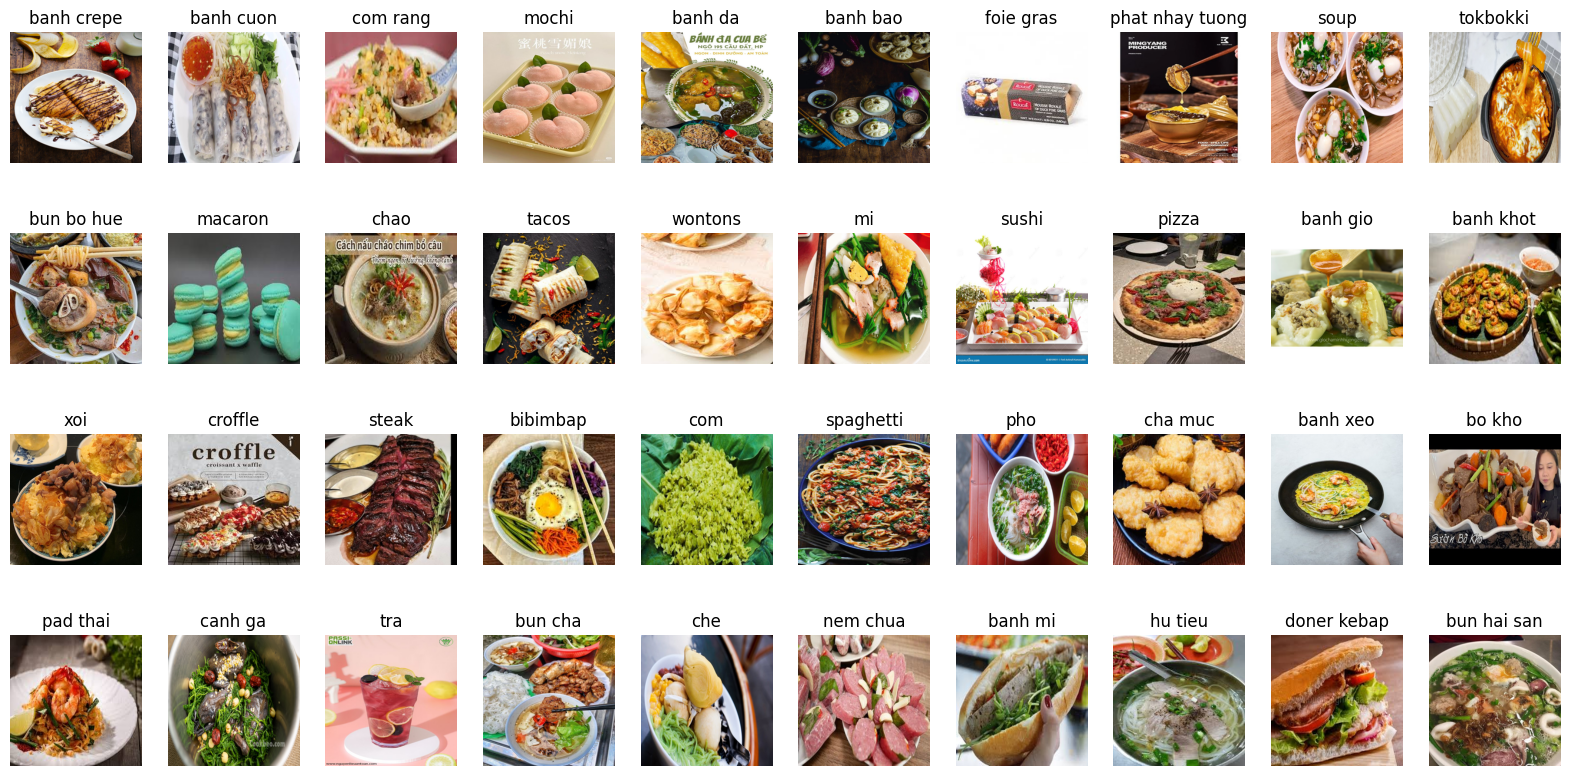

In [64]:
def display_sample_images(dir, num_samples, target_size):
    food_files = get_food_name (dir)

    selected_foods = random.sample(list(food_files.keys()), min(num_samples, len(food_files)))
    
    plt.figure(figsize=(20, 10))
    
    for i, food_name in enumerate(selected_foods):
        selected_file = random.choice(food_files[food_name])
        img_path = os.path.join(directory, selected_file)
        img = Image.open(img_path)
        
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        
        # Hiển thị ảnh
        plt.subplot(4, 10, i + 1)
        plt.imshow(img_resized)
        plt.axis('off')
        plt.title(food_name, size=12)
    
    plt.show()

# Đường dẫn tới thư mục chứa ảnh
directory = r'data\images'

# Hiển thị ngẫu nhiên 20 ảnh từ 20 món ăn khác nhau
display_sample_images(directory, num_samples=40, target_size=(224, 224))


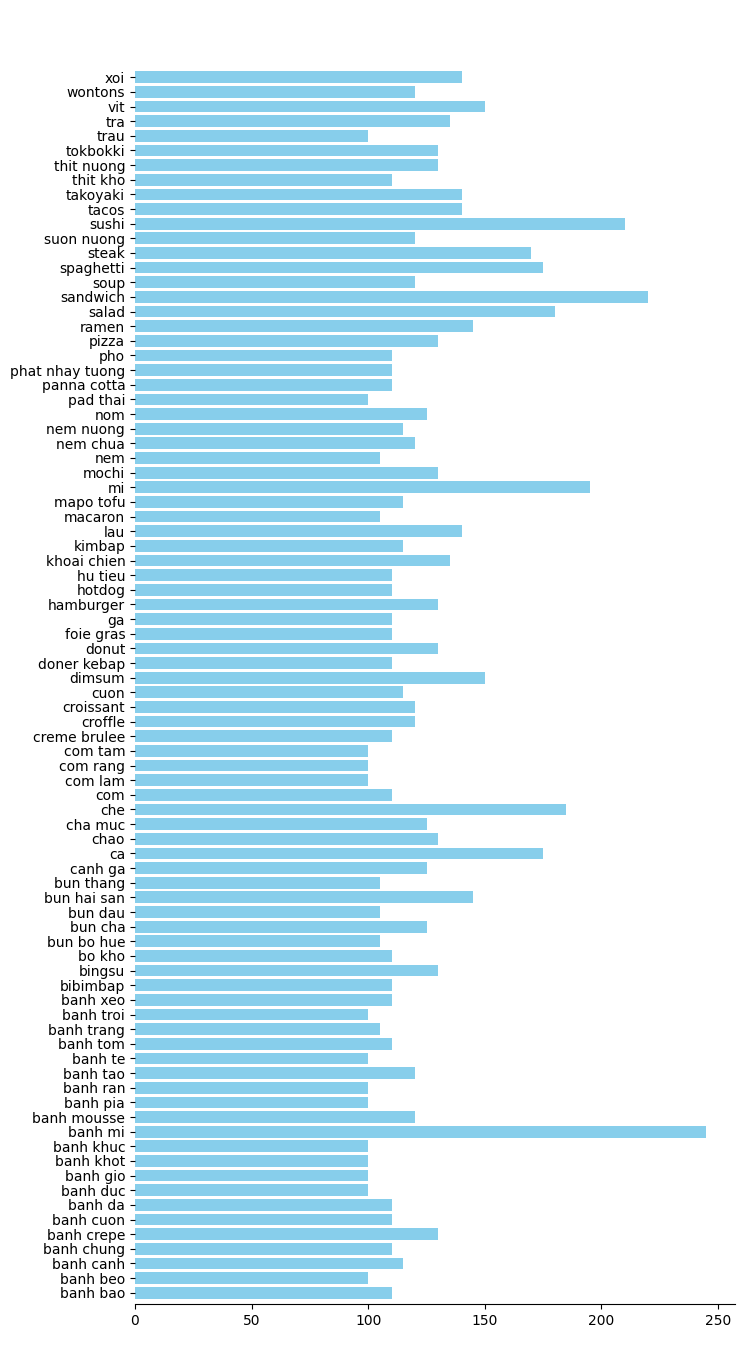

In [141]:
import matplotlib.ticker as ticker

def display_statistics_number_images(directory):
    food_files = get_food_name(directory)

    # Tạo từ điển chứa số lượng ảnh của mỗi món ăn
    food_counts = {food_name: len(files) for food_name, files in food_files.items()}

    # Tách tên món ăn và số lượng ảnh
    food_names = list(food_counts.keys())
    image_counts = list(food_counts.values())
    
    # Tạo biểu đồ cột
    plt.figure(figsize=(10, 15))
    plt.barh(food_names, image_counts, color='skyblue')
    plt.subplots_adjust(left=0.2, right=0.8, top=0.95, bottom=0.05)
    plt.gca().spines['bottom'].set_position(('outward', -40))
    # plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.show()

display_statistics_number_images(r'data\images')